In [1]:
from scipy.stats import multivariate_normal
import scipy.signal as sig

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from tqdm import tqdm

In [2]:
# define Guassian kernel

def norm_kernel(size = 9, sigma = 2):
    sig = sigma * np.eye(2)
    mean = np.zeros(2,)
    size_min = -(size - 1)/2
    size_max = (size - 1)/2
    x = np.linspace(size_min, size_max, size)
    y = np.linspace(size_min, size_max, size)
    xk, yk = np.meshgrid(x, y)
    kernel = np.zeros((size,size), dtype=np.float32)
    for i in range(size):
        for j in range(size):
            coord = np.squeeze([xk[i,j], yk[i,j]])
            kernel[i,j] = multivariate_normal.pdf(coord, mean=mean, cov=sig)
    kernel_sum = np.sum(kernel)
    kernel = kernel / kernel_sum
    return kernel

In [3]:
facies_file_path = '/Users/tiagofroes/LTrace/facies.npy'
facies = np.load(facies_file_path)

print(([facies.shape[0]]+[8]+[*facies.shape[1:]]))

[32640, 8, 1, 64, 64]


In [4]:
prob_rlzs = np.zeros(([facies.shape[0]]+[8]+[*facies.shape[1:]]), dtype=np.float32) # dimension = [35640, 8, 1, 64, 64]  
count = 0
for k in range(13,28,2):
    print(f"{k}")
    kernel = norm_kernel(size = k, sigma = k)  # size should be set to be odd
    for num in tqdm(range(facies.shape[0])):
        cur_image = facies[num,0]/255.0
        padvalue = np.mean(cur_image)
        prob_image = sig.convolve2d(cur_image, kernel, fillvalue = padvalue, mode='same') 
        prob_rlzs[num, count, 0] = prob_image 
            
    count = count + 1 

13


100%|██████████| 32640/32640 [01:32<00:00, 351.42it/s]


15


100%|██████████| 32640/32640 [02:15<00:00, 240.01it/s]


17


100%|██████████| 32640/32640 [02:44<00:00, 198.36it/s]


19


100%|██████████| 32640/32640 [03:14<00:00, 167.50it/s]


21


100%|██████████| 32640/32640 [03:59<00:00, 136.34it/s]


23


100%|██████████| 32640/32640 [04:57<00:00, 109.66it/s]


25


100%|██████████| 32640/32640 [06:56<00:00, 78.44it/s]  


27


100%|██████████| 32640/32640 [07:19<00:00, 74.25it/s] 


In [5]:
np.save('/Users/tiagofroes/LTrace/probs.npy', prob_rlzs)

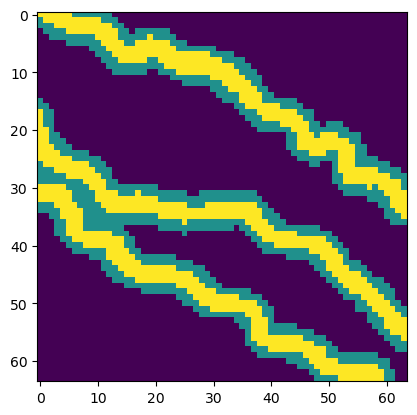

In [6]:
plt.imshow(facies[77,0])

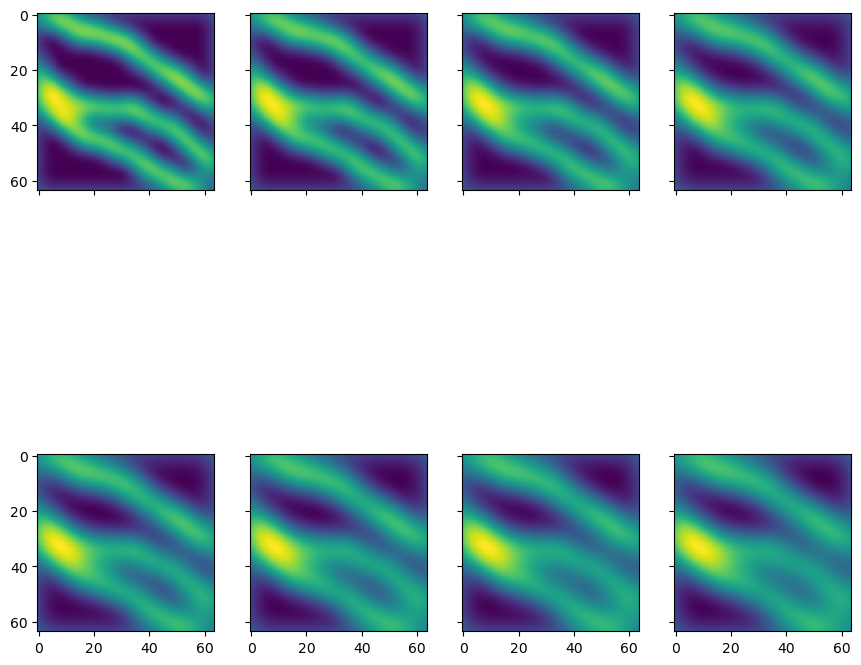

In [7]:
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row')
fig.set_size_inches(10.5, 10.5, forward=True)
  
for i in range (2):
  for j in range(4):
    ax[i, j].imshow(prob_rlzs[77, i*4 + j,0,:,:])

In [8]:
prob_rlzs = prob_rlzs.reshape(-1,1, 64, 64)
print(prob_rlzs.shape)

(261120, 1, 64, 64)


In [25]:
# Generate random well points

well_points = np.zeros(prob_rlzs.shape, dtype = int)
for i in range(prob_rlzs.shape[0]):
    well_points_num = np.random.choice(np.arange(1, 21), 1)  # Random choose the expected total number of well points
    xs = np.random.choice(64, well_points_num)
    ys = np.random.choice(64, well_points_num)
    well_points[i, 0, xs, ys] = 1

: 

In [26]:
Prob_rlzs_max = np.max(prob_rlzs, axis = (2, 3), keepdims = True)
Prob_rlzs_min = np.min(prob_rlzs, axis = (2, 3), keepdims = True)
well_facies = well_points * (prob_rlzs - Prob_rlzs_min)/(Prob_rlzs_max - Prob_rlzs_min)

In [ ]:
# Sample well facies according to calculated probability maps.
well_facies = np.where(well_facies<=0.4, 0, well_facies)  

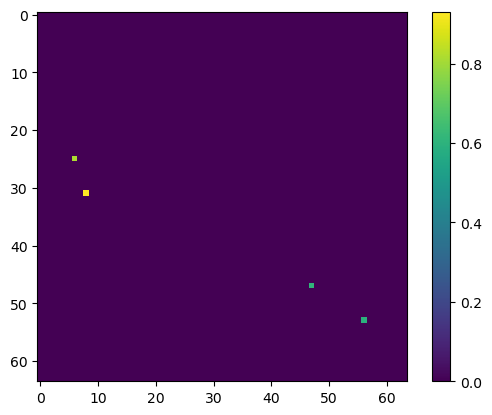

In [ ]:
plt.imshow(well_facies[77,0])
plt.colorbar()

In [ ]:
np.save('/Users/tiagofroes/LTrace/well_facies.npy', well_facies)

OSError: 1069547520 requested and 885141504 written

In [ ]:
well_facies[77][0][31]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.93075465, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])